# Basic plotting of Pandas Data Frame

In this article, we are interested in books which have been sold more than 50 millions copies worldwide. We will download relevant data on the internet and then analyse it. We will investigate plots as well. 

I watched the tutorial "Data Analysis with Python - Full Course for Beginners (Numpy, Pandas, Matplotlib, Seaborn)."

https://www.youtube.com/watch?v=r-uOLxNrNk8&t=13929s

https://github.com/ine-rmotr-curriculum

I also watched the turorial "Python Plotting Tutorial w/ Matplotlib & Pandas (Line Graph, Histogram, Pie Chart, Box & Whiskers)."

https://www.youtube.com/watch?v=0P7QnIQDBJY

We first import some modules we need.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

We can see the version of pandas with the following two methods.

`print(pd.__version__)` in text editor

`pip show pandas` in terminal

In [2]:
print(np.__version__)

1.20.3


How about matplotlib.pyplot?

In [3]:
import matplotlib
print(matplotlib.__version__)

3.4.2


Now, we try to get data on the internet.

In [4]:
html_url = "https://en.wikipedia.org/wiki/List_of_best-selling_books"
r = requests.get(html_url)
books = pd.read_html(r.text, header=0)
len(books)
books1 = books[1]
books1.head()

,Book,Author(s),Original language,First published,Approximate sales,Genre
0,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120 million[17][18],Fantasy
1,The Little Prince,Antoine de Saint-Exupéry,French,1943,100 million[19],Novella
2,Dream of the Red Chamber,Cao Xueqin,Chinese,18th century,100 million[19],Family saga
3,The Hobbit,J. R. R. Tolkien,English,1937,100 million[19],Fantasy
4,And Then There Were None,Agatha Christie,English,1939,100 million[20],Mystery


In [5]:
books2 = books[2]
books2.head()

,Book,Author(s),Original language,First published,Approximate sales,Genre
0,"The Lion, the Witch and the Wardrobe",C. S. Lewis,English,1950,85 million[21],Fantasy
1,She: A History of Adventure,H. Rider Haggard,English,1887,83 million[22],Adventure
2,The Adventures of Pinocchio (Le avventure di P...,Carlo Collodi,Italian,1881,>80 million[23][24],Fantasy
3,The Da Vinci Code,Dan Brown,English,2003,80 million[25],Mystery thriller
4,Harry Potter and the Chamber of Secrets,J. K. Rowling,English,1998,77 million[26],Fantasy


We combine those two tables.

In [6]:
frames = [books1, books2]
books=pd.concat(frames)

We set the index.

In [7]:
index = np.arange(33)
index=index[1:]
books["Rank"]=index
books.set_index('Rank', inplace=True)
books

,Book,Author(s),Original language,First published,Approximate sales,Genre
Rank,,,,,,
1,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120 million[17][18],Fantasy
2,The Little Prince,Antoine de Saint-Exupéry,French,1943,100 million[19],Novella
3,Dream of the Red Chamber,Cao Xueqin,Chinese,18th century,100 million[19],Family saga
4,The Hobbit,J. R. R. Tolkien,English,1937,100 million[19],Fantasy
5,And Then There Were None,Agatha Christie,English,1939,100 million[20],Mystery
6,"The Lion, the Witch and the Wardrobe",C. S. Lewis,English,1950,85 million[21],Fantasy
7,She: A History of Adventure,H. Rider Haggard,English,1887,83 million[22],Adventure
8,The Adventures of Pinocchio (Le avventure di P...,Carlo Collodi,Italian,1881,>80 million[23][24],Fantasy
9,The Da Vinci Code,Dan Brown,English,2003,80 million[25],Mystery thriller


I want to drop the '>' and many references in the columne 'Approximate Sales' and then change it into a number.
I can see that the genre 'The Ginger Man' is missing. I want to define the genre of 'The Ginger Man' as 'The others.'
Let's see the summary of the data frame first.

In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 1 to 32
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Book               32 non-null     object
 1   Author(s)          32 non-null     object
 2   Original language  32 non-null     object
 3   First published    32 non-null     object
 4   Approximate sales  32 non-null     object
 5   Genre              31 non-null     object
dtypes: object(6)
memory usage: 1.8+ KB


We drop the '>' and references in the columne 'Approximate Sales' and then we want to change it into a number. 

In [9]:
books['Approximate sales'] = books['Approximate sales'].str.replace('>', '')

In [10]:
Approx_sales = books['Approximate sales']
Num = Approx_sales.str.split().str[0]
books["Approximate sales(in millions)"] = Num
books.drop(columns='Approximate sales', inplace=True)
books.head()

,Book,Author(s),Original language,First published,Genre,Approximate sales(in millions)
Rank,,,,,,
1,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,Fantasy,120
2,The Little Prince,Antoine de Saint-Exupéry,French,1943,Novella,100
3,Dream of the Red Chamber,Cao Xueqin,Chinese,18th century,Family saga,100
4,The Hobbit,J. R. R. Tolkien,English,1937,Fantasy,100
5,And Then There Were None,Agatha Christie,English,1939,Mystery,100


Is the values in the column 'Approximate sales(in million)' not numbers?

In [11]:
books.dtypes

Book                              object
Author(s)                         object
Original language                 object
First published                   object
Genre                             object
Approximate sales(in millions)    object
dtype: object

No, they are not numbers. Let's change them into numbers.

In [12]:
books['Approximate sales(in millions)'] = pd.to_numeric(books['Approximate sales(in millions)'])

In [13]:
books.dtypes

Book                              object
Author(s)                         object
Original language                 object
First published                   object
Genre                             object
Approximate sales(in millions)     int64
dtype: object

We made it! If we denote million in numbers, what does it look like?

In [14]:
books['Approximate sales']=books['Approximate sales(in millions)'].apply(lambda x: x*1000000)
books.head()

,Book,Author(s),Original language,First published,Genre,Approximate sales(in millions),Approximate sales
Rank,,,,,,,
1,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,Fantasy,120,120000000
2,The Little Prince,Antoine de Saint-Exupéry,French,1943,Novella,100,100000000
3,Dream of the Red Chamber,Cao Xueqin,Chinese,18th century,Family saga,100,100000000
4,The Hobbit,J. R. R. Tolkien,English,1937,Fantasy,100,100000000
5,And Then There Were None,Agatha Christie,English,1939,Mystery,100,100000000


Hmm..., it looks too much! I will drop it.

In [15]:
books.drop(columns='Approximate sales', inplace=True)

Now, I will fill out the missing value, genre of "The Ginger Man."

In [16]:
books.at[32, 'Genre']= "The others"
books.tail()

,Book,Author(s),Original language,First published,Genre,Approximate sales(in millions)
Rank,,,,,,
28,The Eagle Has Landed,Jack Higgins,English,1975,"War, thriller",50
29,Watership Down,Richard Adams,English,1972,Fantasy,50
30,The Hite Report,Shere Hite,English,1976,Sexology,50
31,Charlotte's Web,E. B. White; illustrated by Garth Williams,English,1952,Children's fiction,50
32,The Ginger Man,J. P. Donleavy,English,1955,The others,50


## plots

We make plots for the last four columns, 'Original language', 'First published', 'Genre', 'Approximate sales(in million).'

##### 1. Bar Plot of Original language 

We first try a bar plot. I will not choose the default style. 
You can find many plot styles on the following website.
https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

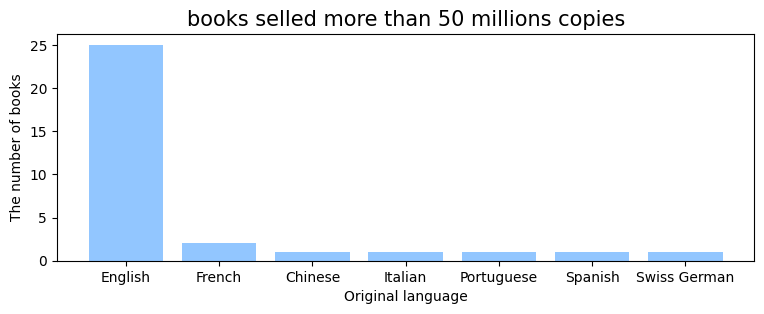

In [17]:
lang = books['Original language'].unique()
values = books['Original language'].value_counts()

plt.style.use('seaborn-pastel')
plt.figure(figsize=(9,3), dpi=100)
plt.style.use('seaborn-pastel')
plt.title('books selled more than 50 millions copies', fontdict={'fontsize' : 15})
plt.xlabel('Original language')
plt.ylabel('The number of books')
plt.bar(lang, values)
plt.show()

Here is a different method. https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

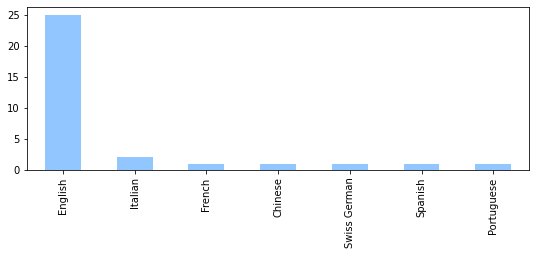

In [18]:
books['Original language'].value_counts().plot(kind = 'bar', figsize=(9,3))
plt.show()

#### 2. Pie Plot of First published

In [19]:
books['First published'].unique()

array(['1997', '1943', '18th century', '1937', '1939', 1950, 1887, 1881,
       2003, 1998, 1999, 2000, 2005, 2007, 1988, 1951, 1992, 1880, 1984,
       1967, 1955, 1946, 1908, 1877, 1980, 1975, 1972, 1976, 1952],
      dtype=object)

It seems like some values are string and some are integers. 
We change '18th century' into 1750 and convert this column into numbers.

In [20]:
books['First published'] = [int(x) if type(x) == str and x!= '18th century' else x for x in books['First published']]
books['First published'] = [int(1750) if x == '18th century' else x for x in books['First published']]

In [21]:
books['First published'].unique()

array([1997, 1943, 1750, 1937, 1939, 1950, 1887, 1881, 2003, 1998, 1999,
       2000, 2005, 2007, 1988, 1951, 1992, 1880, 1984, 1967, 1955, 1946,
       1908, 1877, 1980, 1975, 1972, 1976, 1952])

In [22]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 1 to 32
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Book                            32 non-null     object
 1   Author(s)                       32 non-null     object
 2   Original language               32 non-null     object
 3   First published                 32 non-null     int64 
 4   Genre                           32 non-null     object
 5   Approximate sales(in millions)  32 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 2.8+ KB


We made it! This time, I will use hex color.

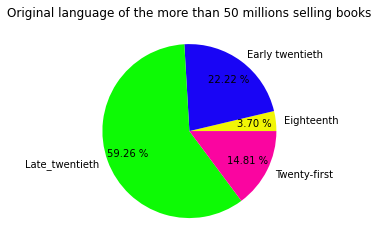

In [23]:
Eighteenth = books.loc[books['First published'] == 1750].count()[0]
Early_twentieth = books.loc[(books['First published'] >1900) & (books['First published'] <1951)].count()[0]
Late_twentieth = books.loc[(books['First published'] >1950) & (books['First published'] <2001)].count()[0]
Twenty_first= books.loc[books['First published'] >2000].count()[0]
plt.title("Original language of the more than 50 millions selling books")
labels = ['Eighteenth', 'Early twentieth', 'Late_twentieth', 'Twenty-first']
colors=['#f1f505', '#1905f5', '#0dfa05', '#fa05a0']
plt.pie([Eighteenth, Early_twentieth, Late_twentieth, Twenty_first], labels=labels, colors=colors, pctdistance=0.75, autopct = '%.2f %%')
plt.show()

##### 3. Approximate sales per Genre

In this section, we will draw a chart indicating how many copies have been sold for each genre based on the data frame. 
In fact, I have never seen this kind of trial on tutorials. All I have seen were about charts of columns without much processs. I am not sure if there is a better method. I will make a new data frame consisting of two columns, Genre and the sum of sold copies.

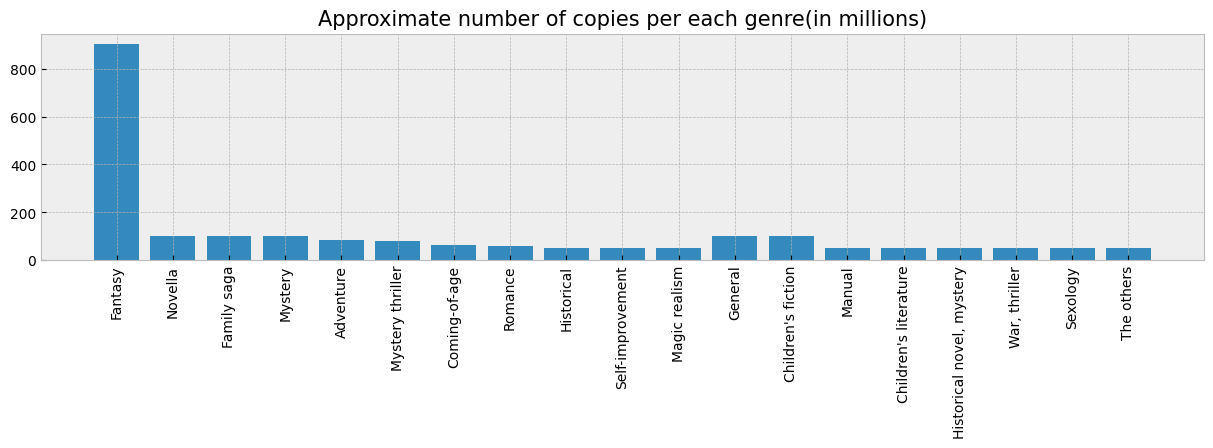

In [24]:
genres = list(books['Genre'].unique())

def df_genre(genre):
    return pd.DataFrame(books.loc[books['Genre'] == genre])
def value_genre(x):
    return (df_genre(x)['Approximate sales(in millions)'].sum())        


genre_a = list(genre for genre in genres)
genre_b = list(value_genre(genre) for genre in genres)

df = pd.DataFrame({'A' : genre_a, 'B' : genre_b})
plt.figure(figsize=(15,3), dpi=100)
plt.style.use('bmh')
plt.title('Approximate number of copies per each genre(in millions)', fontdict={'fontsize' : 15})
plt.xticks(rotation=90)
plt.bar(df['A'], df['B'])
plt.show()

I actually draw a bar plot of the following data frame.

In [25]:
df

,A,B
0,Fantasy,902
1,Novella,100
2,Family saga,100
3,Mystery,100
4,Adventure,83
5,Mystery thriller,80
6,Coming-of-age,65
7,Romance,60
8,Historical,50
9,Self-improvement,50
